# 🚵‍♂️ **KNN (K Nearest Neighbors) Implementation Example on Iris Dataset**

### 🌸 **1. Dataset Introduction — IRIS**

> **The Iris dataset contains 150 flower samples**

**3 Classes (species):**

- Iris-setosa      --> 0

- Iris-versicolor --> 1

- Iris-virginica   --> 2

**Each flower has 4 measurements:**

| Feature      | Description |
| ------------ | ----------- |
| sepal length | cm          |
| sepal width  | cm          |
| petal length | cm          |
| petal width  | cm          |


### **📦 2. Load Dataset**



In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

x = iris.data
y = iris.target

df = pd.DataFrame(data = x, columns= iris.feature_names)
df['target'] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **🧠 3. EDA (Exploratory Data Analysis)**

**3.1 Dataset Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**3.2 Class Distribution**

In [5]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

### **📈 4. Visualization**


**4.1 Scatter Plot: Petal width vs petal length**

- **Setosa is clearly separable**

- **Versicolor and virginica overlap a bit**

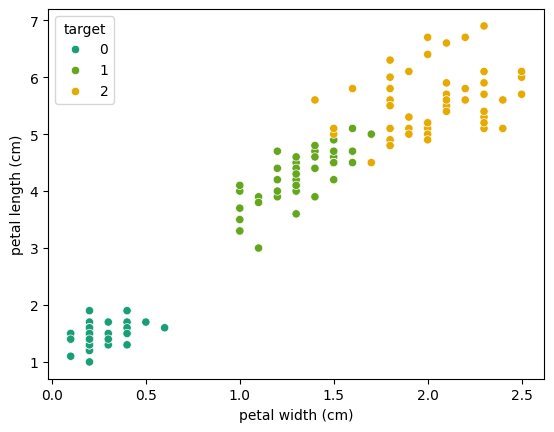

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


dark2 = sns.color_palette("Dark2")
palette = [dark2[0], dark2[4], dark2[5]]

sns.scatterplot(
    data = df,
    x = df['petal width (cm)'],
    y = df['petal length (cm)'],
    hue = df['target'],
    palette = palette
)

plt.show()

### **🧪 5. Train–Test Split**

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size = 0.2, 
    random_state = 42, 
    stratify=y# stratify -> preserves classs ratio
)



### **⚖️ 6. Scaling and Pipeline**

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [15]:

knn_clf = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(
            n_neighbors=5,
            weights = "uniform",
            algorithm = 'auto',
            metric = 'minkowski',
            p = 2
            
        ))
    ]
)

### **7. Training**

In [16]:
knn_clf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

### **8. Scores**

In [17]:
print(f"Training Score: {knn_clf.score(x_train, y_train)}")
print(f"Testing Score: {knn_clf.score(x_test, y_test)}")

Training Score: 0.975
Testing Score: 1.0


### **9. Prediction**

In [18]:
y_pred = knn_clf.predict(x_test)

### **10. Model Evaluations**


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
print(f"Accuracy_score: {accuracy_score(y_test, y_pred)}")

Accuracy_score: 1.0


In [24]:
print(f"Confusion Matrix:\n\n{confusion_matrix(y_test, y_pred)}")

Confusion Matrix:

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [23]:
print(f"Classification Report:\n\n{classification_report(y_test, y_pred)}")

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **11. Confusion Matrix visualization**

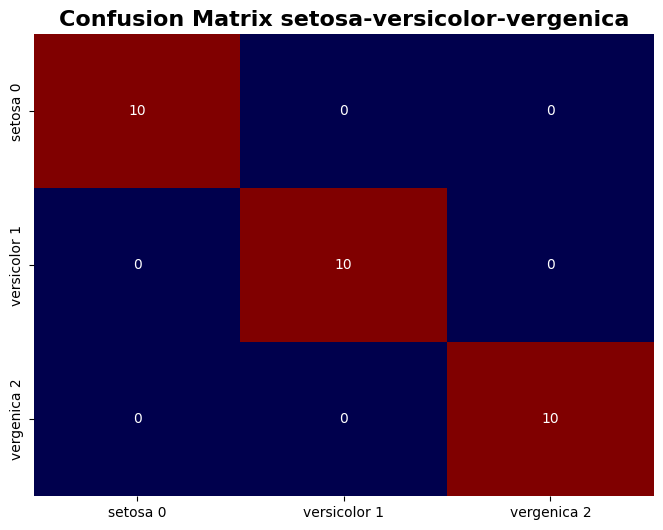

In [28]:
plt.figure(figsize = (8, 6))

sns.heatmap(
    data = confusion_matrix(y_test, y_pred),
    annot = True,
    cbar = False,
    cmap = 'seismic',
    xticklabels = ['setosa 0', 'versicolor 1', 'vergenica 2'],
    yticklabels = ['setosa 0', 'versicolor 1', 'vergenica 2']
)
plt.title("Confusion Matrix setosa-versicolor-vergenica",fontweight = 'bold', fontsize = 16)
plt.show()

### **12 ROC (Reciever Operating Characteristics) Curve Visualization**

**\*Checking For Versicolor Only**

In [42]:
import numpy as np
y_test_ver = np.where(((y_test == 2) | (y_test == 0)), 0, 1) 
y_pred_prob = knn_clf.predict_proba(x_test)[:,1]

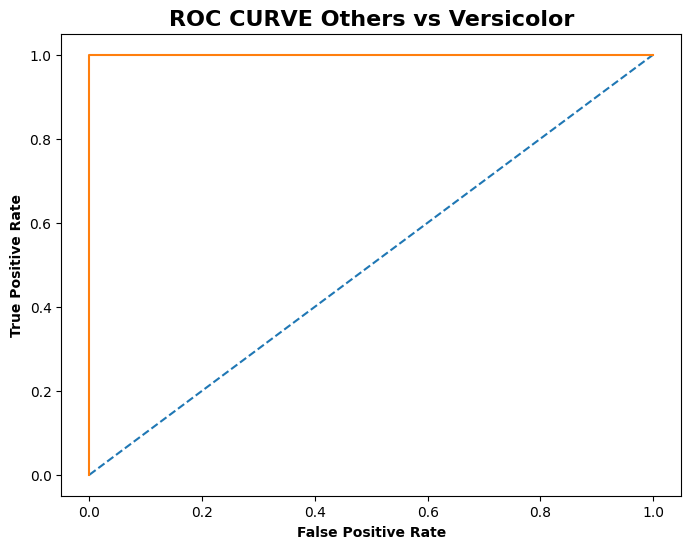

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_test_ver, y_pred_prob)

plt.figure(figsize = (8,6))
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot(fpr, tpr)
plt.title("ROC CURVE Others vs Versicolor",fontweight = 'bold', fontsize = 16)
plt.xlabel("False Positive Rate", fontweight = 'bold')
plt.ylabel("True Positive Rate", fontweight = 'bold')

plt.show()

### **13 Precision-Recall Curve**

**\*only for versicolor**

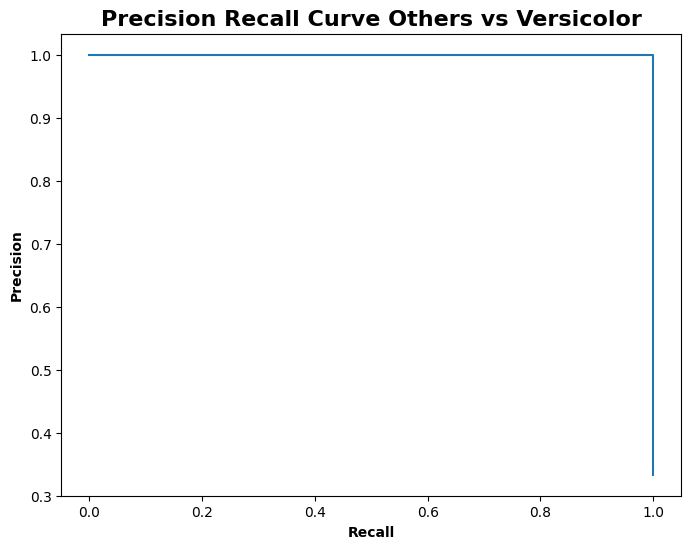

In [47]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresh = precision_recall_curve(y_test_ver, y_pred_prob)

plt.figure(figsize = (8,6))
plt.plot(rec,prec)
plt.xlabel("Recall",fontweight= 'bold') 
plt.ylabel("Precision",fontweight= 'bold') 
plt.title("Precision Recall Curve Others vs Versicolor",fontweight='bold',fontsize = 16)
plt.show()

### **14 Learning Curves**

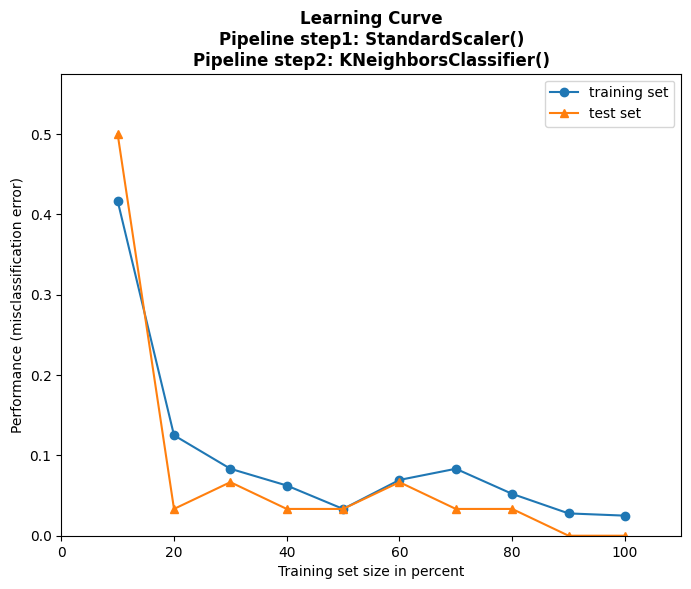

In [50]:
from mlxtend.plotting import plot_learning_curves

plt.figure(figsize = (8,6))
plot_learning_curves(x_train, y_train, x_test, y_test, clf = knn_clf)
plt.title("Learning Curve\nPipeline step1: StandardScaler()\nPipeline step2: KNeighborsClassifier()", fontweight = 'bold')
plt.show()

### **15. Hyper Parameter Tuning: Using GridSearchCV**

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameter_grid = {
    'knn__n_neighbors': [1,3,5,7,9,11],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

In [53]:
gridscv = GridSearchCV(
    estimator = knn_clf,
    param_grid = parameter_grid,
    cv = 5,
    scoring = 'accuracy'
)

gridscv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 9, 11],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [55]:
print(f"Best Parameters: {gridscv.best_params_}")
print(f"Best Score: {gridscv.best_score_}")

Best Parameters: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'uniform'}
Best Score: 0.9666666666666668
